In [ ]:
import yaml
import h5py
import numpy as np
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import nibabel as nib
import pandas as pd
from IPython.display import clear_output
from skimage.segmentation import find_boundaries
import importlib 

In [2]:
sys.path.insert(1, "/Users/dvarelat/Documents/MASTER/TFM/methods")
import cardiac_region
importlib.reload(cardiac_region)
import cardiac_region as c

In [3]:
os.listdir("/Users/dvarelat/Documents/MASTER/TFM/DATA//DAPIdv_ejemplos")

['20190208_E2_DAPIdv_decon_20200526_193148_seg2D.nii.gz',
 '20190208_E2_DAPIdv_decon_20200526_193148_seg2D_0.5.nii.gz',
 '.DS_Store',
 '20190404_E1_DAPIdv_decon_20200601_081046_seg2D_0.5.nii.gz',
 '20190401_E1_DAPIdv_decon_20200529_095615_seg2D.nii.gz',
 '20190401_E1_DAPIdv_decon_20200529_095615_seg2D_0.5.nii.gz',
 '20190404_E1_DAPIdv_decon_20200601_081046_seg2D.nii.gz']

In [25]:
seg2d = "/Users/dvarelat/Documents/MASTER/TFM/DATA/DAPIdv_ejemplos/20190401_E1_DAPIdv_decon_20200601_081046_seg2D_0.5.nii.gz"


In [28]:
decon05_cc_nu ="/Users/dvarelat/Documents/MASTER/TFM/DATA/CardiacRegion/20190404_E1/20190404_E1_DAPI_CardiacRegion_0.5.nii.gz"
decon05_cc_mem ="/Users/dvarelat/Documents/MASTER/TFM/DATA/CardiacRegion/20190404_E1/20190404_E1_mGFP_CardiacRegion_0.5.nii.gz"

In [32]:
decon05_nu ="/Users/dvarelat/Documents/MASTER/TFM/DATA/DECON_05/DAPI/20190404_E1_DAPI_decon_0.5.nii.gz"

In [6]:
linefile = "/Users/dvarelat/Documents/MASTER/TFM/DATA/LINES/line_20190404_E1.nii.gz"

In [ ]:
os.path.isfile(decon05_cc_mem)

In [33]:
nuclei05 = nib.load(decon05_nu).get_fdata()
nuclei05.shape

(1024, 1024, 590, 1)

In [34]:
nuclei05 = nuclei05[:,:,:, 0]
nuclei05.shape

(1024, 1024, 590)

In [8]:
nucleiDIV = nib.load(seg2d).get_fdata()
nucleiDIV.shape 

(1024, 1024, 590, 1)

In [35]:
nucleiDIV = nucleiDIV[:,:,:, 0]
nucleiDIV.shape

(1024, 1024, 590)

### CORTAR CARDIAC REGION

In [ ]:
c.load3D_metadata(seg2d)

In [ ]:
c.load3D_metadata(nuclei05)

In [9]:
margenes = c.crop_line(linefile, seg2d, escala2048=False, ma=5)

MARGIN : 5
Line information
{'x_size': 1024, 'y_size': 1024, 'z_size': 590, 'x_res': 0.813325, 'y_res': 0.813325, 'z_res': 0.99691}
LINE SHAPE = (1024, 1024, 590)
SCALING WITH DECON 05 --> 1024 - margen 10
{'x_size': 1024, 'y_size': 1024, 'z_size': 590, 'x_res': 0.873604, 'y_res': 0.873604, 'z_res': 0.99691}


In [10]:
cut_seg2d = c.crop_embryo(margenes, seg2d)

CROP SHAPE = (877, 829, 526, 1)


In [14]:
cut_seg2d = cut_seg2d[:,:,:, 0]
cut_seg2d.shape

(877, 829, 526)

In [ ]:
X = cut_seg2d[300:1000,300:800,:]

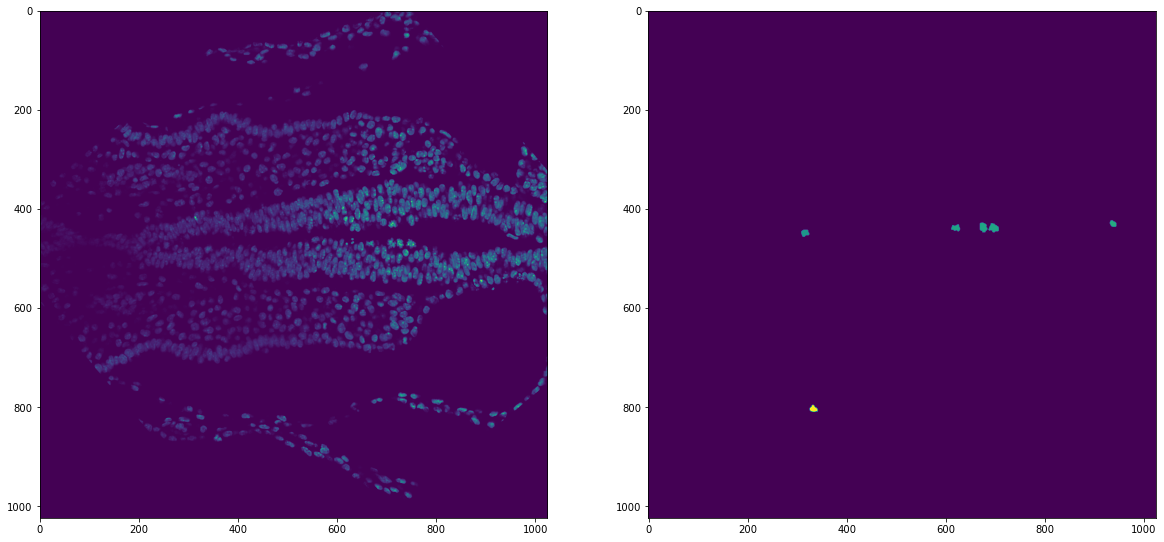

In [38]:
for t in range(24):
    plt.figure(figsize=(20,20)) 
    n = 20*t
    plots = [nuclei05[:,:,n], nucleiDIV[:,:,n]]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1)
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)    

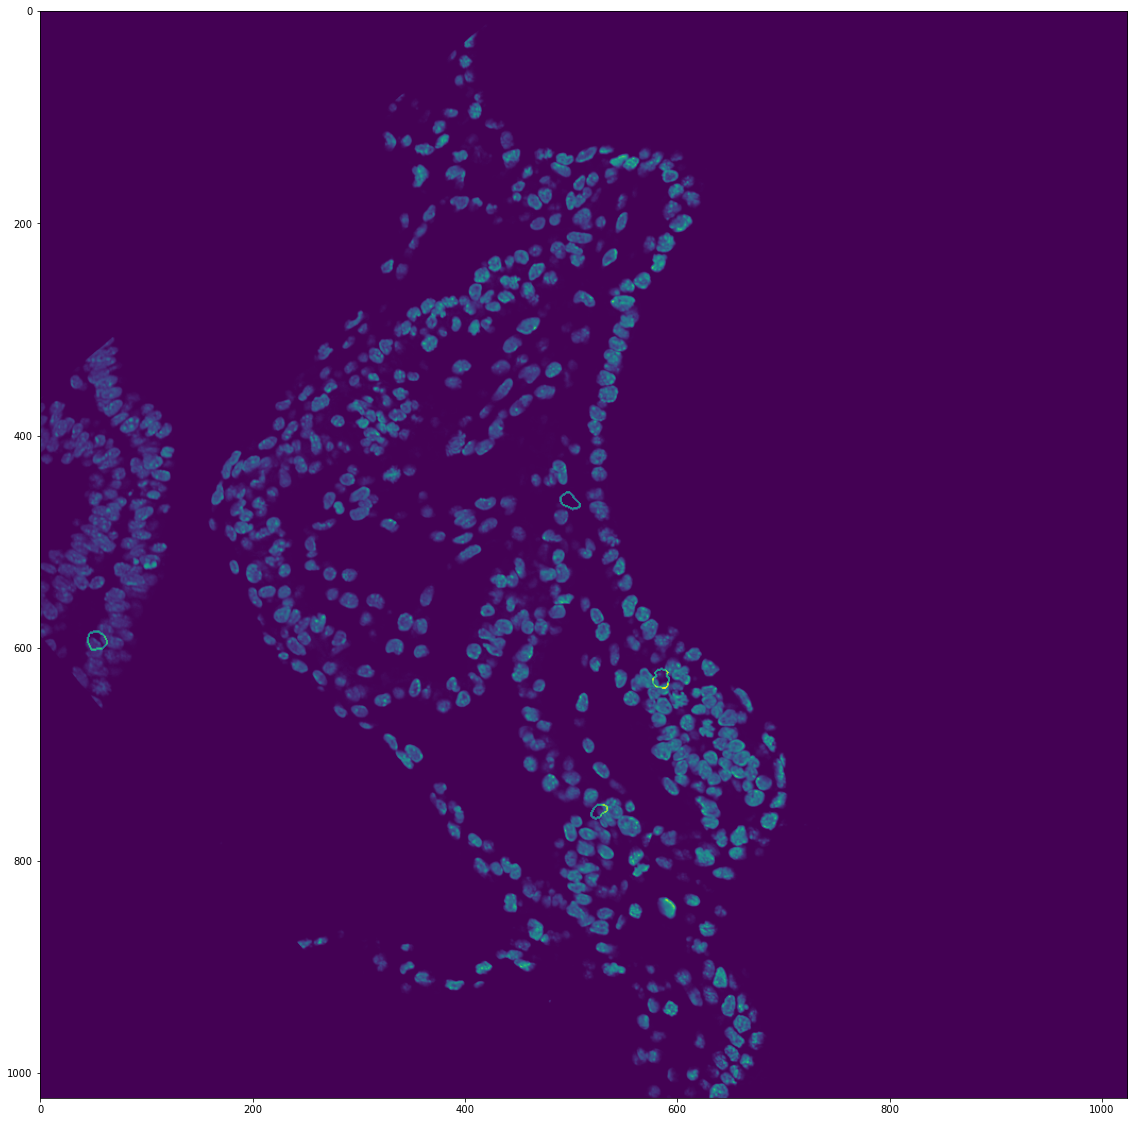

In [36]:
n= 200
plt.figure(figsize=(20,20)) 
plots = [find_boundaries(nucleiDIV[:,:,n])*100 + nuclei05[:,:,n]]
for i in range(len(plots)):
    plt.subplot(1,len(plots), i+1)
    plt.imshow(plots[i])

In [ ]:
data = nib.load(seg2d).get_fdata()
print(data.shape)